## Introduction to Binary Search
A searching algorithm is a limited search space. Only applicable when sorted.

### Find X in a sorted array
Consider the sorted array [3,4,6,7,9,12,16,17]  
We have to find 6  
The below shows how to find 6 using binary search
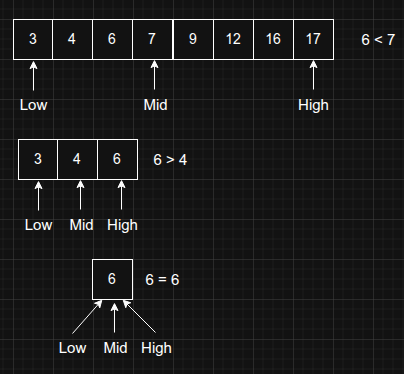

In [1]:
arr = [3,4,6,7,9,12,16,17]
target = 6
low = 0
high = len(arr) - 1
while low <= high:
    mid = int((low+high)/2)
    if arr[mid] == target:
        print(mid)
        break
    elif target > arr[mid]:
        low = mid+1
    else:
        high = mid-1
print(-1)

2
-1


In [8]:
# Using Recursion
def binarySearch(arr,low,high,target):
    if low > high:
        return -1
    mid = int((low+high)/2)
    if arr[mid] == target:
        return mid
    elif target > arr[mid]:
        return binarySearch(arr,mid+1,high,target)
    return binarySearch(arr,low,mid-1,target)

arr = [3,4,6,7,9,12,16,17]
target = 12

print(binarySearch(arr,0,len(arr)-1,target))

5


#### Time Complexity
We are divide the array into 2 for every iteration  
The time complexity is O(log<sub>2</sub> n)

### Lower Bound
The smallest index such that the number at that index is greater than or equal to the given number.  
Consider the array [3,5,8,15,19]  
Ex: x = 1, here 5 >= 1 at index 3 so 3 is the lower bound.  
If none of the element satisfy  the condition, then size of the array is the lower bound.

#### Using binary search
Consider the below array and x = 1  
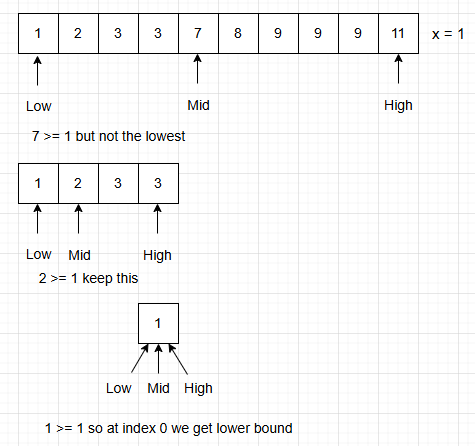

In [ ]:
# Using binary search
arr = [1,2,3,3,7,8,9,9,9,11]
target = 1
low = 0
high = len(arr) - 1
ans = len(arr)
while(low <= high):
    mid = int((low+high)/2)
    if arr[mid] >= target:
        ans = mid
        high = mid-1
    else:
        low = mid+1
print(ans)
# Time complexity: O(log n)
# Space complexity: O(1)

0


### Upper Bound
The smallest index such that arr[index] > x.

In [4]:
# Using binary search
target = 6
low = 0
high = len(arr) - 1
ans = len(arr)
while(low <= high):
    mid = int((low+high)/2)
    if arr[mid] > target:
        ans = mid
        high = mid -1
    else:
        low = mid+1
print(ans)
# Time complexity: O(log n)
# Space complexity: O(1)

4


### Search insert position
Given a sorted array of distinct integers and a target value, return the index if the target is found. If not, return the index where it would be if it were inserted in order.  
Consider array [1,2,4,7], x = 6 is inserted then array = [1,2,4,6,7]. When we insert 6, 7 will be pushed back and 6 will take 7's place.  
This problem is similar to lower bound.

In [ ]:
# Using binary search
arr = [1,2,4,7]
target = 6
low = 0
high = len(arr) - 1
ans = len(arr)
while(low <= high):
    mid = int((low+high)/2)
    if arr[mid] >= target:
        ans = mid
        high = mid-1
    else:
        low = mid+1
print(ans)
# Time complexity: O(log n)
# Space complexity: O(1)

3


### Floor and ceil in a sorted array
Floor: largest no in array <= target  
Ceil: smallest no in array >= target  
Consider the array [10,20,30,40,50], target = 25  
Here floor: 20 and ceil: 30

To find the floor it is similar to the lower bound with the change in condition and also ceil is same as lower bound

In [11]:
def floor(arr,target):
    low = 0
    high = len(arr) - 1
    ans = -1
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] <= target:
            ans = arr[mid]
            low= mid + 1
        else:
            high = mid - 1
    return ans

def ceil(arr,target):
    low = 0
    high = len(arr) - 1
    ans = -1
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] >= target:
            ans = arr[mid]
            high = mid -1
        else:
            low = mid +1
    return ans

arr = [10,20,30,40,50]
target = 25
print("Floor:",floor(arr,target))
print("Ceil:",ceil(arr,target))
# Time complexity: O(2 log n)
# Space complexity: O(1)

Floor: 20
Ceil: 30


### First and Last occurance of a number
Consider the array: [2,4,6,8,8,8,11,13], the given target is 8, we have to find first and last index of 8 here [3,5]


In [ ]:
# Brute force: Using linear search
first = -1
last = -1
arr = [2,4,6,8,8,8,11,13]
target = 8
for i in range(len(arr)):
    if arr[i]==target:
        if first==-1:
            first = i
        last = i
print([first,last])
# Time complexity: O(n)
# Space complexity: O(1)

[3, 5]


#### Using binary search
first occurance -> lower_bound(target)  
last occurance -> upper_bound(target) - 1

In [ ]:
# Optimal: Upper bound and lower bound
def lower_bound(arr,target):
    low = 0
    high = len(arr) - 1
    ans = len(arr)
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] >= target:
            ans = mid
            high = mid -1
        else:
            low = mid +1
    return ans

def upper_bound(arr,target):
    low = 0
    high = len(arr) - 1
    ans = len(arr)
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] > target:
            ans = mid
            high = mid -1
        else:
            low = mid +1
    return ans

arr = [2,4,6,8,8,8,11,13]
lb = lower_bound(arr,target)
up = upper_bound(arr,target)-1

if lb==len(arr) or arr[lb]!=target:
    # For extreme cases like if the element is not existing in the array
    print([-1,-1])
else:
    print([lb,up])

# Time complexity: O(2 log n)
# Space complexity: O(1)

[3, 5]


#### Using plain binary search
We will use 2 different binary search for first and last occurance  
For first  
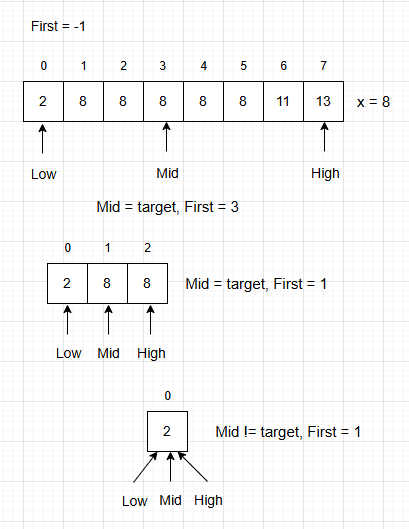  
Similary for last occurance go to right  
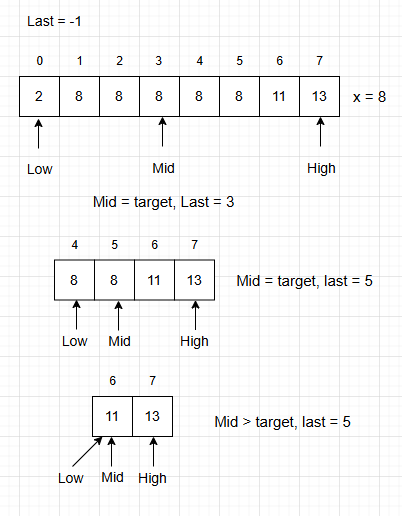


In [ ]:
# Optimal: Using binary search
def first(arr,target):
    low = 0
    high = len(arr)-1
    first = -1
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] == target:
            first = mid
            high = mid-1
        elif arr[mid]<target:
            low = mid+1
        else:
            high = mid-1
    return first

def last(arr,target):
    low = 0
    high = len(arr)-1
    last = -1
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] == target:
            last = mid
            low = mid+1
        elif arr[mid]<target:
            low = mid+1
        else:
            high = mid-1
    return last

print(first(arr,target))
print(last(arr,target))

# Time complexity: O(2 log n)
# Space complexity: O(1)

3
5


### Counting the number of occurances
Consider array [2,8,8,8,8,8,11,13], target = 8, we have to find out the total number of occurance of 8  
Here it is 5

We can count = last_occurance - first_occurance + 1, since the array is sorted.

In [9]:
# Using binary search
arr = [2,8,8,8,8,8,11,13]
target = 8
first = first(arr,target)
last = last(arr,target)
count = last - first + 1
print(count)

5


### Search in rotated sorted array I
Consider the array [7,8,9,1,2,3,4,5,6]  
The array is sorted and rotated at 3 places, if we re-do the rotation the array will look like [1,2,3,4,5,6,7,8,9]  
We have to search target = 1 in the rotated and sorted array.

First we have to identify the sorted half.  
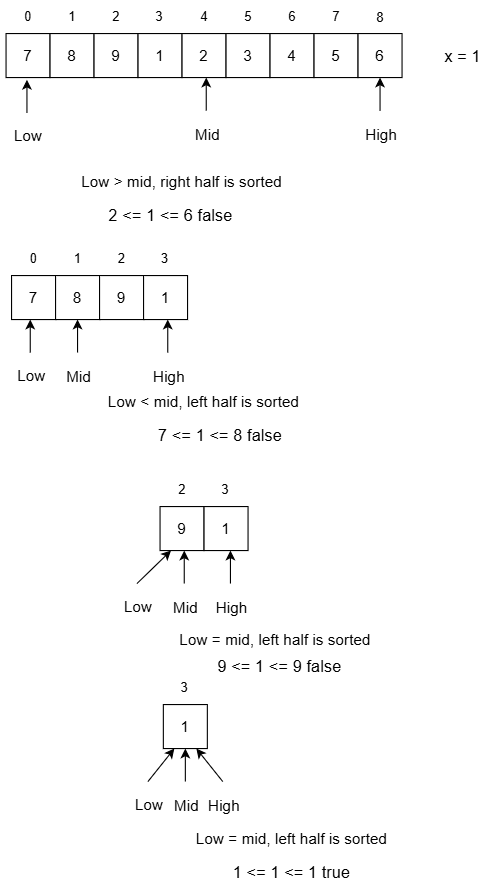  

In [3]:
# Using binary search
def rotatedSort(arr,target):
    low = 0
    high = len(arr)-1
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] == target:
            return mid
        # left is sorted
        if arr[low] <= arr[mid]:
            if arr[low] <= target and target <= arr[mid]:
                high = mid-1
            else:
                low = mid+1
        # right is sorted
        else:
            if arr[mid] <= target and target <= arr[high]:
                low = mid+1
            else:
                high = mid-1
    return -1
arr = [7,8,9,1,2,3,4,5,6]
target = 1
print(rotatedSort(arr,target))
# Time complexity: O(log n)
# Space complexity: O(1)

3


### Search in rotated sorted array II
Consider the following array - [7,8,1,2,3,3,3,4,5,6] ,the array rotated after sorting and it contains duplicates, We have search the target = 3 in the array.  

The only problem here is when finding which part is sorted we will encounter a scenario like  
arr[low] = arr[mid] = arr[high]  
Here we reduce the low and high by 1.

In [2]:
def rotatedSort(arr,target):
    low = 0
    high = len(arr)-1
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] == target:
            return True
        if arr[mid] == arr[low] and arr[mid] == arr[high]:
            low = low+1
            high = high-1
            continue
        # left is sorted
        if arr[low] <= arr[mid]:
            if arr[low] <= target and target <= arr[mid]:
                high = mid-1
            else:
                low = mid+1
        # right is sorted
        else:
            if arr[mid] <= target and target <= arr[high]:
                low = mid+1
            else:
                high = mid-1
    return False
arr = [7,8,1,2,3,3,3,4,5,6]
target = 3
print(rotatedSort(arr,target))
# Time complexity: O(log n) - average, because of duplicates we shrink the array at worst case: O(n/2)
# Space complexity: O(1)

True


### Minimum in rotated sorted array
Consider the array - [4,5,6,7,0,1,2], we have to find the out the minimum number in the array.

1. Identify the sorted half
2. The sorted half may or may not contain the minimum
3. Pick the minimum in the sorted half either low or mid and eliminated the sorted half
4. Either low = mid+1 or high = mid-1
5. Repeat from step-1

In [4]:
import sys
# Using binary search
def mini(arr):
    low = 0
    high = len(arr) - 1
    ans = sys.maxsize
    while low<=high:
        mid = int((low+high)/2)
        # If left is sorted
        if arr[low] <= arr[mid]:
            ans = min(ans,arr[low])
            low = mid+1
        # If right is sorted
        else:
            ans = min(ans,arr[mid])
            high = mid-1
    return ans
arr = [4,5,6,7,0,1,2]
print(mini(arr))
# Time complexity: O(log n)
# Space complexity: O(1)


0


### How many times array is rotated
Consider array = [3,4,5,1,2] we to find out how many times it have to rotated

From previous concept if we find the minimum (since the array is sorted), the minimum is always the starting number but since the array is rotated the starting number will be pushed back to a index will say that this number of times the minimum has been pushed which will give us the answer.

In [13]:
import sys
# Using binary search
def mini(arr):
    low = 0
    high = len(arr) - 1
    ans = sys.maxsize
    index = -1
    while low<=high:
        mid = int((low+high)/2)
        # If left is sorted
        if arr[low] <= arr[mid]:
            if ans > arr[low]:
                ans = arr[low]
                index = low
            low = mid+1
        # If right is sorted
        else:
            if ans > arr[mid]:
                ans = arr[mid]
                index = mid
            high = mid-1
    return index

arr = [3,4,5,1,2]
print(mini(arr))
# Time complexity: O(log n)
# Space complexity: O(1)


3


### Single element in sorted array
Consider the array [1,1,2,2,3,3,4,5,5,6,6]  
All the elements appearing twice, only one element will be appearing once  
We have to find that element.

If we stand at one index either right or left element should be same, ind-1|ind or ind|ind+1, if bpth are not same then that element is single.

In [4]:
# Brute force
arr = [1,1,2,2,3,3,4,5,5,6,6]
for i in range(len(arr)):
    # if first element
    if i == 0:
        if arr[i]!=arr[i+1]:
            print(arr[0])
            break
    # if last element\
    elif i == len(arr)-1:
        if arr[i]!=arr[i-1]:
            print(arr[i])
            break
    else:
        if arr[i]!=arr[i+1] and arr[i]!=arr[i-1]:
            print(arr[i])
            break

# Time complexity: O(n)
# Space complexity: O(1)


4


#### Using binary search
Consider array and there indexes  
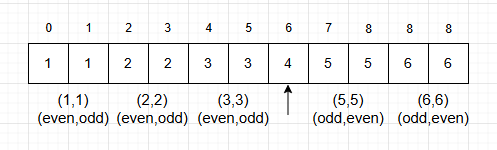  

if even < odd => element is on right half  
else => element is on the left half

Then arr[mid] -> left or right are not same then that is the number

To edge case like first and last element, set low=1 and high=n-2, trim search 

- left half : if index is even next number should be same, if index is odd previous number should be same
- right half : if index is odd next number should be same, if index is even previous number should be same

In [6]:
def single(arr, n):
    # Edge cases
    if n==1:
        return arr[0]
    if arr[0]!=arr[1]:
        return arr[0]
    if arr[n-1]!=arr[n-2]:
        return arr[n-1]
    
    # Binary search
    low = 1
    high = n-2
    while low<=high:
        mid = int((low+high)/2)
        # check if this is the single element
        if arr[mid]!=arr[mid-1] and arr[mid]!=arr[mid+1]:
            return arr[mid]
        # Left half even < odd
        if (mid%2!=0 and arr[mid-1]==arr[mid]) or (mid%2==0 and arr[mid+1]==arr[mid]):
            low = mid+1
        else:
            high = mid-1
    return -1

arr = [1,1,2,2,3,3,4,5,5,6,6]
n = len(arr)
print(single(arr,n))

# Time complexity: O(log n)
# Space complexity: O(1)
    
    

4


### Peak element
Peak element in an array is said to be arr[i-1] < arr[i] > arr[i+1]  
Consider array -> [1,2,3,4,5,6,7,8,5,1], here 8 is the peak element  
Consider array -> [1,2,1,3,5,6,4], here 2 and 6 are peak elements  
Consider array -> [1,2,3,4,5], here 5 is the peak element  
Consider array -> [5,4,2,3,1], here 5 and 3 are peak elements

For linear search, for each element, check for left and right  
ind-1|ind|ind+1

In [14]:
arr = [1,2,3,4,5,6,7,8,5,1]
for i in range(len(arr)):
    # first element
    if i==0:
        if arr[i]>arr[i+1]:
            print(i)
            break
    # last element
    elif i==len(arr)-1:
        if arr[i]>arr[i-1]:
            print(i)
            break
    else:
        if arr[i]>arr[i-1] and arr[i]>arr[i+1]:
            print(i)
            break


7


In [16]:
arr = [1,2,3,4,5,6,7,8,5,1]
for i in range(len(arr)):
    if (i==0 or arr[i-1]<arr[i]) and (i==len(arr)-1 or arr[i]>arr[i+1]):
        print("index:",i,"element:",arr[i])
        break

# Time complexity: O(log n)
# Space complexity: O(1)

index: 7 element: 8


#### Using binary search

##### One peak
Consider the array has one peak [1,2,3,4,5,6,7,8,5,1]  
Edge cases:
if len(arr)==1 the peak - 0  
arr[0]>arr[1] peak is at first - 0  
arr[n-1]>arr[n-2] peak is at last - n-1  

Set low = 1 and high = n-2  
Check if mid is the peak  
If mid on left and peak on right, eliminate left  
If mid on right and peak on left, eliminate right  
Repeat until low crosses high

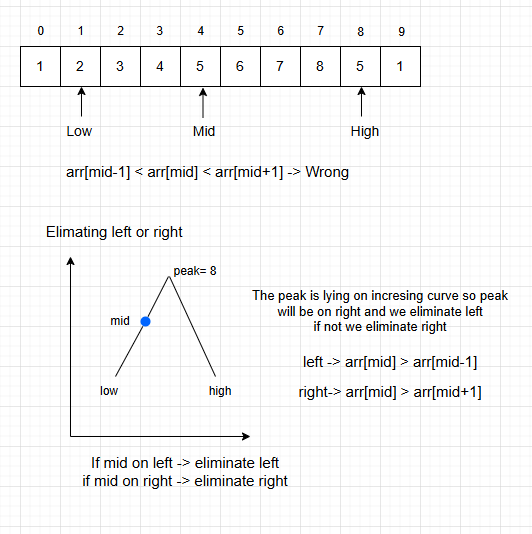

In [19]:
# using binary search
def peak(arr,n):
    # edge cases
    if n==1:
        return 0
    if arr[0]>arr[1]:
        return 0
    if arr[n-1]>arr[n-2]:
        return n-1
    
    # binary search
    low = 1
    high = n-2
    while low<=high:
        mid = int((low+high)/2)
        # check mid is the peak
        if arr[mid]>arr[mid-1] and arr[mid]>arr[mid+1]:
            return mid
        # left side (increasing curve)
        if arr[mid] > arr[mid-1]:
            low = mid+1
        # right side (decreasing curve)
        else:
            high = mid-1

arr = [1,2,3,4,5,6,7,8,5,1]
n = len(arr)
i = peak(arr, n)
print("index:",i,"element:",arr[i])

index: 7 element: 8


##### Multiple peak
Consider the case below where we have multiple peaks  
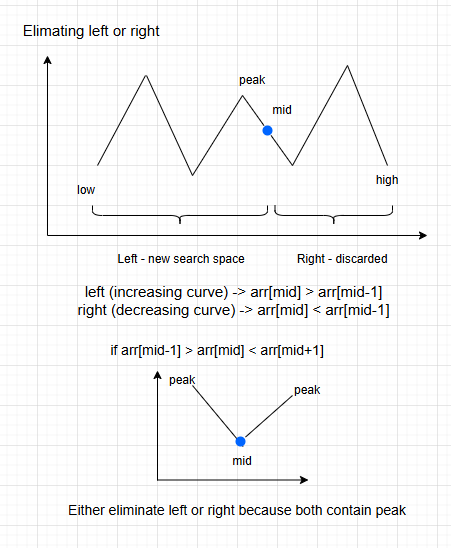  

One edge case can be arr[mid-1] > arr[mid] < arr[mid+1]  
So we can either low = mid+1 or right = mid-1


In [22]:
# using binary search
def peak(arr,n):
    # edge cases
    if n==1:
        return 0
    if arr[0]>arr[1]:
        return 0
    if arr[n-1]>arr[n-2]:
        return n-1
    
    # binary search
    low = 1
    high = n-2
    while low<=high:
        mid = int((low+high)/2)
        # check mid is the peak
        if arr[mid]>arr[mid-1] and arr[mid]>arr[mid+1]:
            return mid
        # left side (increasing curve)
        if arr[mid] > arr[mid-1]:
            low = mid+1
        # right side (decreasing curve)
        elif arr[mid] < arr[mid-1]:
            high = mid-1
        # if any of the cases don't work
        else:
            high = mid-1

arr = [1,2,1,3,5,6,4]
n = len(arr)
i = peak(arr, n)
print("index:",i,"element:",arr[i])
# Time complexity: O(log n)
# Space complexity: O(1)

index: 5 element: 6
